## Appendix: Numerical stability

From the BP equations, the key quantity that affects the numerical stability is $\frac{\partial\mathcal{L}}{\partial\boldsymbol{\mathsf{H}}_t}$ {eq}`state_vec_grad`. Suppose $\boldsymbol{\mathsf{W}}$ has a diagonalization $\boldsymbol{\mathsf{W}} = \boldsymbol{\mathsf{Q}}\boldsymbol{\Lambda} \boldsymbol{\mathsf{Q}}^{-1}$ where $\boldsymbol{\Lambda} = \text{diag}(\lambda_1, \ldots, \lambda_n)$ with $|\lambda_1| > \ldots > |\lambda_n|$, then 

$$
\boldsymbol{\mathsf{W}}^k = \boldsymbol{\mathsf{Q}}\boldsymbol{\Lambda}^k \boldsymbol{\mathsf{Q}}^{-1}.
$$

In this case, the *principal eigenvalue* will dominate. If $|\lambda_1| > 1,$ then this product diverges while if $|\lambda_1| < 1,$ the product quickly vanishes to zero. To see this better, let $\boldsymbol{\mathsf{x}}$ be any vector in $\mathbb{R}^h.$ Then, $\boldsymbol{\mathsf{x}} = \boldsymbol{\mathsf{Q}}\boldsymbol{\mathsf{x}}^\prime.$ Thus, 

$$
\begin{aligned}
\boldsymbol{\mathsf{W}}^k \boldsymbol{\mathsf{x}} &= \boldsymbol{\mathsf{Q}} \boldsymbol{\Lambda}^k \boldsymbol{\mathsf{x}}^\prime \\
&= \lambda_1^k \sum_{i=1}^h {\mathsf{x}}^\prime_i \left(\frac{\lambda_i}{\lambda_1}\right)^k \boldsymbol{\mathsf{q}}_i \to \lambda_1^k  {\mathsf{x}}^\prime_1 \boldsymbol{\mathsf{q}}_1
\end{aligned}
$$

as $k \to \infty.$ Passing in each standard basis element as $\boldsymbol{\mathsf{x}}$, we recover the columns of $\boldsymbol{\mathsf{W}}^k$ as a vector along the principle eigenvector with norm proportional to $|\lambda_1|^k$. 

This is verified in the code below:

In [4]:
from chapter import *

In [5]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(10)

norms = {
    0.9: [],
    1.1: []
}

for c in norms.keys():
    A = np.random.normal(size=(10, 10))
    lambda_1 = np.linalg.norm(np.linalg.eig(A).eigenvalues[0])
    A = A / lambda_1 * c
    x = np.random.randn(10).reshape(-1, 1)
    norms[c].append(np.linalg.norm(x))

    N = 100
    for i in range(N):
        x = A @ x
        norms[c].append(np.linalg.norm(x))

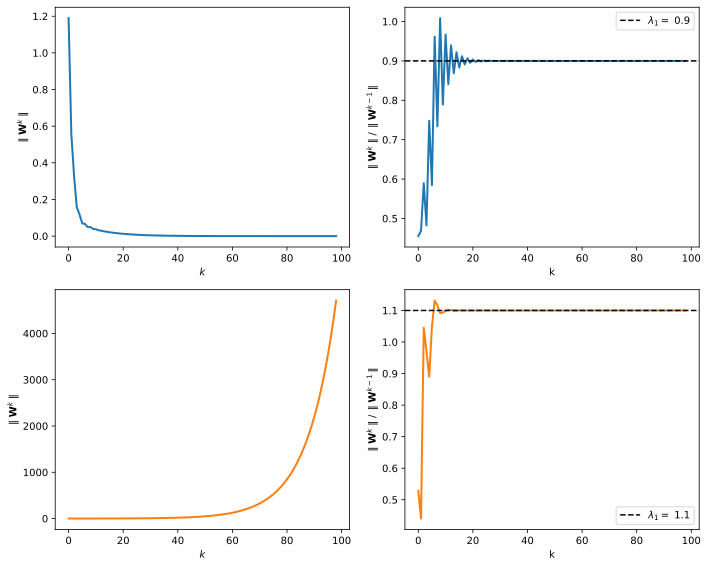

In [11]:
# Plotting
fig, ax = plt.subplots(2, 2, figsize=(10, 8))
for j, c in enumerate(norms.keys()):
    ax[j, 1].plot([norms[c][k] / norms[c][k-1] for k in range(1, N)], color=f"C{j}", linewidth=2)
    ax[j, 1].axhline(c, color="k", linestyle="dashed", label=r"$\lambda_1 =$" + f" {c}")
    ax[j, 1].set_ylabel(r"$\|\; \boldsymbol{\mathbf{W}}^k \;\| \; / \;\, \|\; \boldsymbol{\mathbf{W}}^{k-1} \,\|$")
    ax[j, 1].set_xlabel("k")
    ax[j, 1].legend()

    # Plotting
    ax[j, 0].plot([norms[c][k] for k in range(1, N)], color=f"C{j}", linewidth=2)
    ax[j, 0].set_ylabel(r"$\|\; \boldsymbol{\mathbf{W}}^k \;\|$")
    ax[j, 0].set_xlabel(r"$k$")

fig.tight_layout();